In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn import datasets

iris = datasets.load_iris()




**iris** contains *iris.data* where each column contains information regarding the sepal length(cm), sepal width(cm), petal length(cm), and petal with(cm) names of columns are in ***iris.features_names***

*iris.target* contains the class of the plant: Iris Setosa, Iris Versicolor, Iris Virginica 


Let´s see the dataset at a quick glance


In [9]:
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_data.head()
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Text(0.5, 1.0, 'Petal width (cm)')

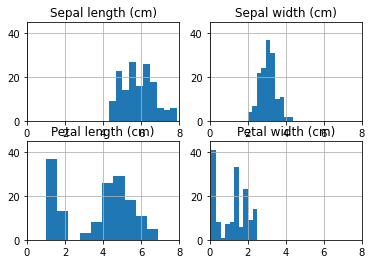

In [10]:
plt.subplot(2,2, 1)
iris_data['sepal length (cm)'].hist(bins = 10)
plt.axis([0, 8, 0, 45])
plt.title('Sepal length (cm)')

plt.subplot(2,2, 2)
iris_data['sepal width (cm)'].hist(bins = 10)
plt.axis([0, 8, 0, 45])
plt.title('Sepal width (cm)')

plt.subplot(2,2, 3)
iris_data['petal length (cm)'].hist(bins = 10)
plt.axis([0, 8, 0, 45])
plt.title('Petal length (cm)')

plt.subplot(2,2, 4)
iris_data['petal width (cm)'].hist(bins = 10)
plt.axis([0, 8, 0, 45])
plt.title('Petal width (cm)')


Text(0, 0.5, 'petal width')

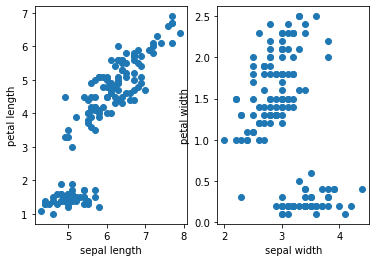

In [11]:
plt.subplot(1,2,1)
plt.scatter(iris_data['sepal length (cm)'], iris_data['petal length (cm)'] )
plt.xlabel('sepal length')
plt.ylabel('petal length')

plt.subplot(1,2,2)
plt.scatter(iris_data['sepal width (cm)'], iris_data['petal width (cm)'] )
plt.xlabel('sepal width')
plt.ylabel('petal width')


a smarter way to get all this graphs using just one line is with the following:

***pandas.plotting.scatter_matrix(df)***

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

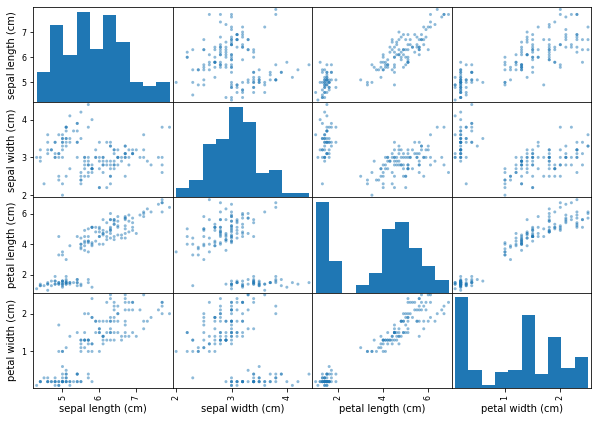

In [12]:
pd.plotting.scatter_matrix(iris_data, figsize = (10,7))

It looks there are at least two clearly distinctive clusters (athough we know there are 3 clusters) 

Now I will try to implement different algorithms to see which one identifies better the 3 iris flowers.
But first let´s standarize the data set

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

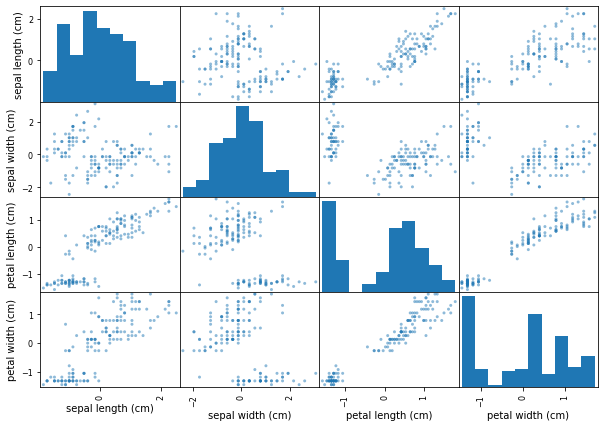

In [33]:
from sklearn import preprocessing

standard = preprocessing.scale(iris_data)
iris_data_stand = pd.DataFrame(standard, columns = iris.feature_names)
pd.plotting.scatter_matrix(iris_data_stand, figsize = (10,7))


### 1. *Kmeans* clustering

#### I am following the procedure of https://realpython.com/k-means-clustering-python/   applied to the iris dataset

#### How does K-means algorithm works in a few words?  
Once we assign number of cluster (k)...
1. The algorithm first randomly initialize the coordenates of the k centroids
2. Calculates distance of each point to all centroids and assign point to its closest centroid and
3. This process runs until centroids coordenates do not change. 

The quality of the cluster is determined by minimizing the sum of squared error (sse)


In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

In [35]:
kmeans = KMeans(init = "random", n_clusters = 3, n_init = 10, max_iter = 300) #parameters of the KMeans class can be changed accordingly

kmeans.fit(scaled_iris_data)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [36]:
# lowest SSE value 
kmeans.inertia_

139.82049635974982

In [37]:
# Number if iterations required to converge
kmeans.n_iter_

6

In [38]:
# Final coordinates of the centroids
centroids = kmeans.cluster_centers_

# array with the predicted labels for each data point
labels = kmeans.labels_

##### Now let´s check how well each cluster was predicted...

Text(0.5, 1.0, 'predicted clusters')

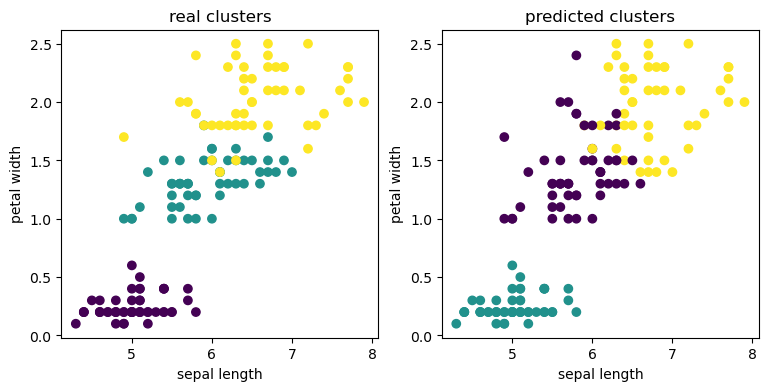

In [85]:
plt.figure(figsize = (9,4))

plt.subplot(1,2,1)
plt.scatter(iris_data['sepal length (cm)'], iris_data['petal width (cm)'], c = iris.target)
plt.xlabel('sepal length')
plt.ylabel('petal width')
plt.title("real clusters")

plt.subplot(1,2,2)
plt.scatter(iris_data['sepal length (cm)'], iris_data['petal width (cm)'], c = labels)
plt.xlabel('sepal length')
plt.ylabel('petal width')
plt.title("predicted clusters")

In [72]:
print(sum(iris.target ==0), sum(iris.target ==1), sum(iris.target ==2)) 
print(sum(labels ==0), sum(labels ==1), sum(labels ==2)) 

iris_data['sepal length (cm)'][0]
iris_data['petal width (cm)'][0]


50 50 50
53 50 47


0.2

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')